#**Machine Learning based Air quality prediction for climate change adaptation**

#1. Importing  Dataset

In [1]:
import pandas as pd

# Read the dataset from a CSV file
data = pd.read_csv('AirQualityUCI.csv', delimiter=';')




In [2]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [3]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(9471, 17)

#2. Data Pre-processing

In [5]:
data.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [6]:
# Set the threshold for missing values in columns (e.g., 10% threshold)
threshold = 0.1 * len(data)  # 10% threshold

# Remove columns with more missing values than the threshold
data_cleaned = data.dropna(axis=1, thresh=threshold)


In [7]:
data_cleaned.shape

(9471, 15)

In [8]:
data_cleaned.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [9]:
data=data_cleaned.dropna()

In [10]:
data.shape

(9357, 15)

In [11]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [13]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Iterate over object columns and encode them
for column in data.select_dtypes(include=['object']):
    data[column] = encoder.fit_transform(data[column])



<ipython-input-13-18f410b0d90b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = encoder.fit_transform(data[column])
<ipython-input-13-18f410b0d90b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = encoder.fit_transform(data[column])
<ipython-input-13-18f410b0d90b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   int64  
 1   Time           9357 non-null   int64  
 2   CO(GT)         9357 non-null   int64  
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   int64  
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   int64  
 13  RH             9357 non-null   int64  
 14  AH             9357 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 1.1 MB


In [15]:

# Calculate the correlation between features and the target variable
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['CO(GT)'].abs()

# Select features with high correlation
important_features = correlation_with_target[correlation_with_target > 0.2].index.tolist()

# Extract the important features from the dataset
new_data = data[important_features]


In [16]:
new_data.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,18,33,1360.0,150.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0
1,19,26,1292.0,112.0,955.0,103.0,1174.0,92.0,1559.0,972.0
2,20,29,1402.0,88.0,939.0,131.0,1140.0,114.0,1555.0,1074.0
3,21,29,1376.0,80.0,948.0,172.0,1092.0,122.0,1584.0,1203.0
4,22,18,1272.0,51.0,836.0,131.0,1205.0,116.0,1490.0,1110.0


#3. Exploratory Data Analysis

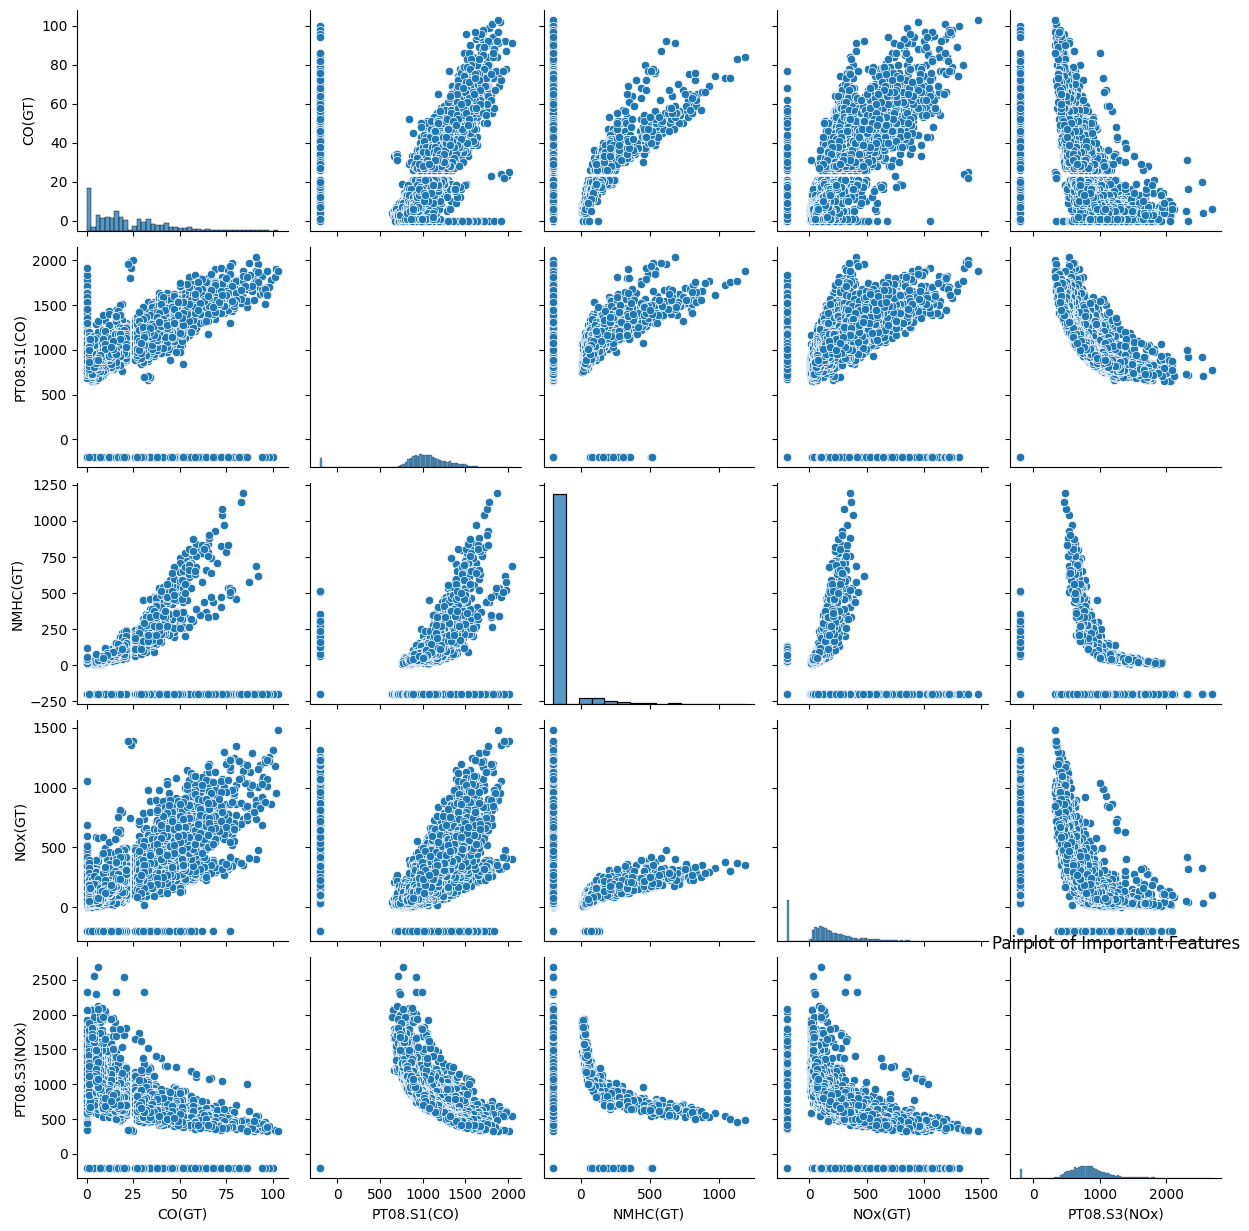

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pairplot
sns.pairplot(new_data, vars=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)', 'PT08.S3(NOx)'])
plt.title("Pairplot of Important Features")
plt.show()



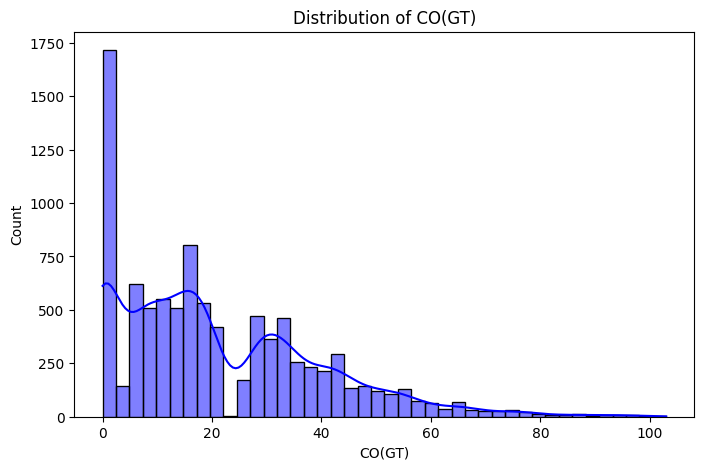

In [18]:

# 2. Histogram for CO(GT)
plt.figure(figsize=(8, 5))
sns.histplot(new_data['CO(GT)'], kde=True, color='blue')
plt.xlabel('CO(GT)')
plt.title('Distribution of CO(GT)')
plt.show()


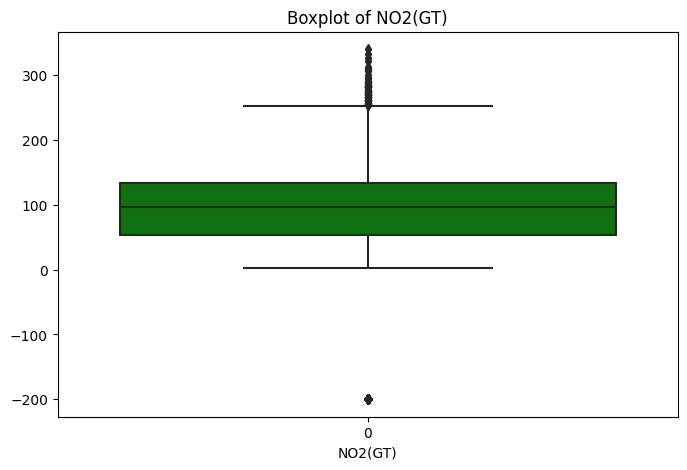

In [19]:

# 3. Boxplot for NO2(GT)
plt.figure(figsize=(8, 5))
sns.boxplot(new_data['NO2(GT)'], color='green')
plt.xlabel('NO2(GT)')
plt.title('Boxplot of NO2(GT)')
plt.show()


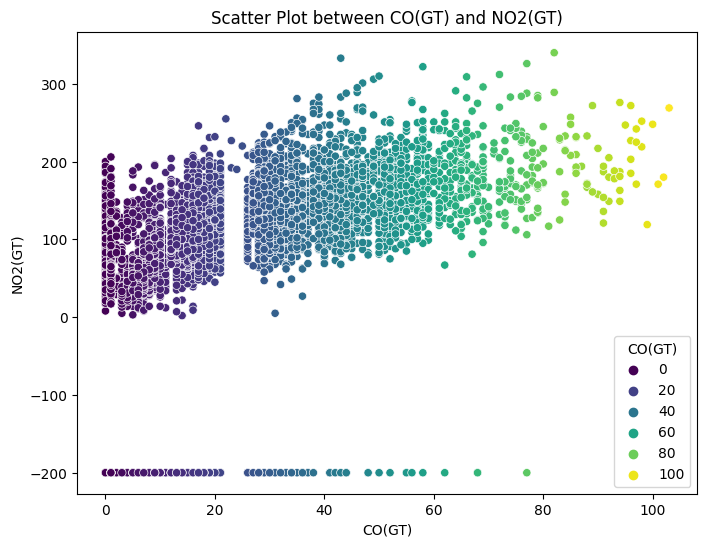

In [20]:

# 4. Scatter plot between CO(GT) and NO2(GT)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='CO(GT)', y='NO2(GT)', hue='CO(GT)', palette='viridis')
plt.title('Scatter Plot between CO(GT) and NO2(GT)')
plt.show()

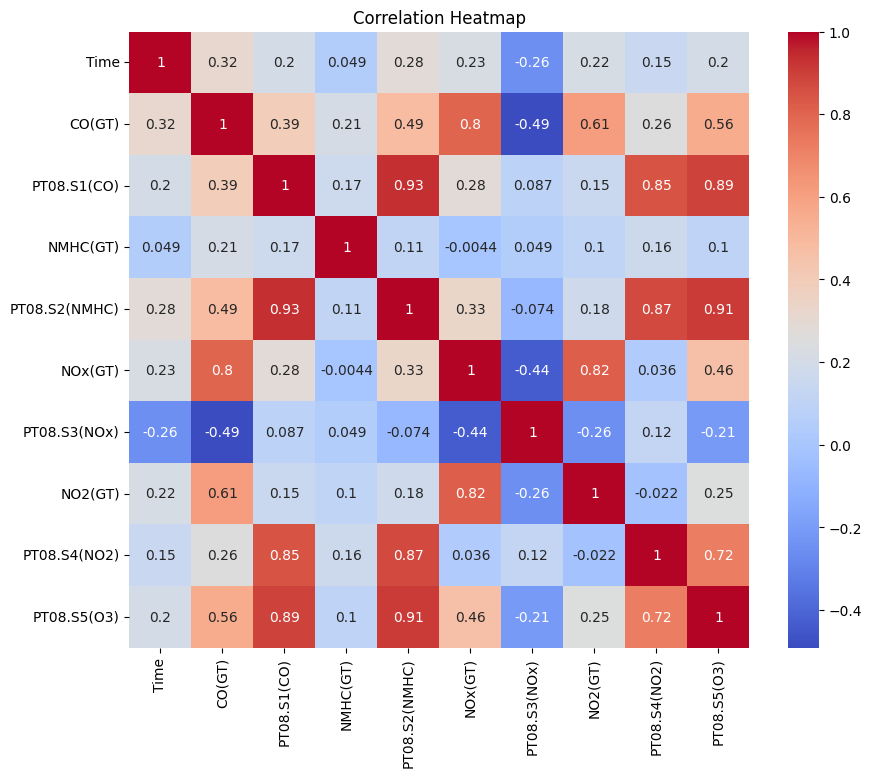

In [21]:

# 5. Heatmap of Correlations
correlation_matrix = new_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#4. Support Vector Regression

Mean Squared Error:  115.48775260956488
R-squared:  0.6718770267298366


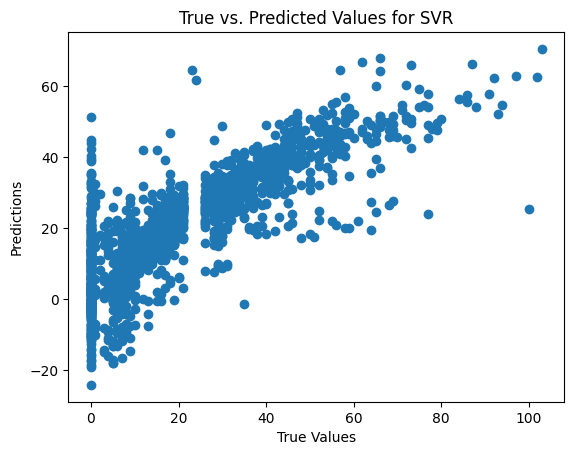

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Select the relevant features and target variable
X = new_data[['Time', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]
y = new_data['CO(GT)']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVR model
svr = SVR(kernel='linear')

# Fit the SVR model to the training data
svr.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Plot the true vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs. Predicted Values for SVR")
plt.show()


#5. Random Forest Regression

Mean Squared Error:  57.44044098822123
R-squared:  0.8368006316070303


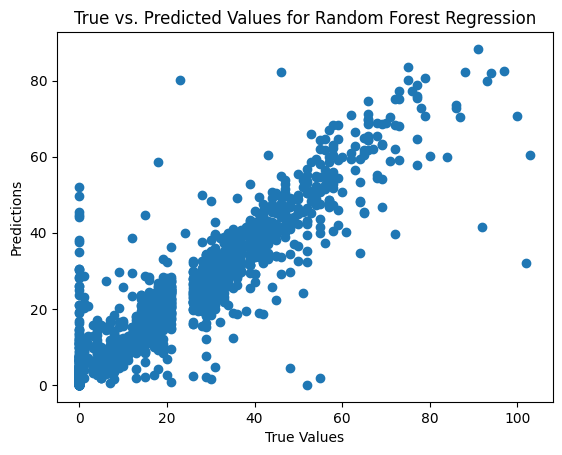

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# data = pd.read_csv('your_dataset.csv', delimiter=';')

# Select the relevant features and target variable
X = new_data[['Time', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]
y = new_data['CO(GT)']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Plot the true vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs. Predicted Values for Random Forest Regression")
plt.show()


#6. Linear Regression

Mean Squared Error:  113.42228601003164
R-squared:  0.6777454155980509


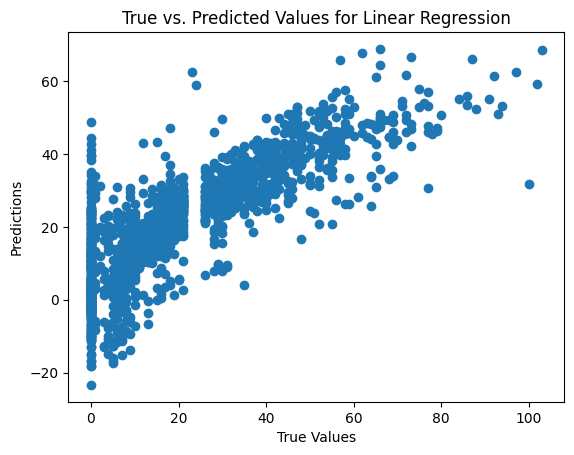

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# data = pd.read_csv('your_dataset.csv', delimiter=';')

# Select the relevant features and target variable
X = new_data[['Time', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]
y = new_data['CO(GT)']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
lr_regressor = LinearRegression()

# Fit the model to the training data
lr_regressor.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = lr_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Plot the true vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs. Predicted Values for Linear Regression")
plt.show()


#7. Decision Tree Regression

Mean Squared Error:  112.02524038461539
R-squared:  0.6817146915952677


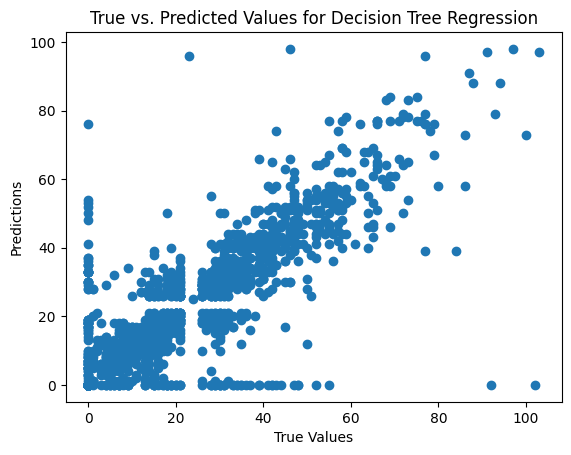

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# data = pd.read_csv('your_dataset.csv', delimiter=';')

# Select the relevant features and target variable
X = data[['Time', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]
y = data['CO(GT)']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Plot the true vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs. Predicted Values for Decision Tree Regression")
plt.show()
